# BUSINESS UNDERSTANDING

There is need for company's to understand their consumers behaviours, tastes and preferences in order to have a competitive edge over competitors. Churn analysis determines likelihood of customers ceasing to consume products or services from a company. Proactive and data-driven businesses are able to leverage on analytics to analyse customer behaviours, strategize customer retention activities, and effectively prioritize their resources to attain business success.  This project's goal is to  develop a machine learning model for a telecommunications company that predicts likelihood of customers churning.(i.e becoming inactive and not making any transactions for 90 days). This solution will help the telecom company to better serve their customers by understanding which customers are at risk of leaving.

# DATA UNDERSTANDING

The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

**user_id**: Unique identifier of a client

**REGION**: The location of each client

**TENURE**: duration in the network

**MONTANT**: top-up amount

**FREQUENCE_RECH**: number of times the customer refilled

**REVENUE**: monthly income of each client

**ARPU_SEGMENT**: income over 90 days / 3

**FREQUENCE**: number of times the client has made an income

**DATA_VOLUME**: number of connections

**ON_NET**: inter expresso call

**ORANGE**: call to orange

**TIGO**: call to Tigo

**ZONE1**: call to zones1

**ZONE2**: call to zones2

**MRG**: a client who is going

**REGULARITY**: number of times the client is active for 90 days

**TOP_PACK**: the most active packs

**FREQ_TOP_PACK**: number of times the client has activated the top pack packages

**CHURN**: variable to predict - Target

### Hypothesis test

**Null Hypothesis**: There is no association between tenure categories and churn

**Alternative Hypothesis**: There is significant association between tenure categories and churn

### Business questions

1. What is the relationship between tenure and churn? Are customers who have stayed longer with the telecom company most likely to churn?

2. What is the relationship between Region and Churn? Are there regions with higher churn rates than others? 

3. Deos regularity and frequence have a correlation to churn? Are customers who are likely to churn have a lower frequence and regularity number?

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, KFold
#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import chi2_contingency
import xgboost as xgb
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
#load train & test datasets

train = pd.read_csv(r"..\datasets\Train.csv")

test = pd.read_csv(r"..\datasets\Test.csv")

#submission = pd.read_csv('SampleSubmission.csv') (do submission.head() & .shape())

In [ ]:
#Preview first five rows of train dataset
train.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [4]:
train['REGION'].unique()

array(['DAKAR', nan, 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [ ]:
#Preview of last rows in train set
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0
1077023,28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f,FATICK,K > 24 month,1500.0,4.0,1499.0,500.0,5.0,1265.0,30.0,4.0,NaN,NaN,0.0,NO,50,On net 200F=Unlimited _call24H,2.0,0


In [ ]:
#information summary on train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [ ]:
#summary of numerical description in train set
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [ ]:
# show distribution of object data types
object_statistics = train.describe(include='O').T
print(object_statistics)

            count   unique                                       top     freq
user_id   1077024  1077024  7ee9e11e342e27c70455960acc80d3f91c1286d1        1
REGION     652687       14                                     DAKAR   256259
TENURE    1077024        8                              K > 24 month  1021853
MRG       1077024        1                                        NO  1077024
TOP_PACK   626129      126                     All-net 500F=2000F;5d   158779


In [ ]:
#Are there missing values in train dataset? What's the count?
print("Missing values in train dataset")
print("----" * 7)
train.isna().sum()

Missing values in train dataset
----------------------------


user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [ ]:
#  What is the percentage of missing values in train columns
percent_missing_values =( (train.isna().sum()/len(train)) * 100)

percent_missing_values.round(2)

user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64

In [ ]:
#Check of duplicates in train dataset
print(f"Count of duplicates in train dataset:", train.duplicated().sum())

Count of duplicates in train dataset: 0


In [ ]:
#preview of test dataset
test.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [ ]:
#Information summary on test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [ ]:
#Check of missing values in test dataset.

print("Missing values in test dataset")
print("----" * 7)

test.isna().sum()

Missing values in test dataset
----------------------------


user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [ ]:
#  What is the percentage of missing values in test columns
percent_missing_values =( (test.isna().sum()/len(test)) * 100)

percent_missing_values.round(2)

user_id            0.00
REGION            39.32
TENURE             0.00
MONTANT           34.92
FREQUENCE_RECH    34.92
REVENUE           33.48
ARPU_SEGMENT      33.48
FREQUENCE         33.48
DATA_VOLUME       49.11
ON_NET            36.46
ORANGE            41.38
TIGO              59.72
ZONE1             92.19
ZONE2             93.68
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.72
FREQ_TOP_PACK     41.72
dtype: float64

In [ ]:
#Are there duplicates in test set?
print(f"Count of duplicates in test dataset:", test.duplicated().sum())

Count of duplicates in test dataset: 0


In [ ]:
#shape of both train and test set
print(f'shape of train set: {train.shape} \n shape of test set: {test.shape}')

shape of train set: (1077024, 19) 
 shape of test set: (190063, 18)


## EDA

The given dataset includes 19 variables with 15 numeric variables and 4 categoricalvariables. It consists of 1,077,024 rows of customer activity. There are missing values as shown above and no duplicate values in the dataset. 

* The following columns will be dropped because of redundancy and percentage of missing values.

**user_id**: This column is redundant because its role is captured by dataframe's index.

**ZONE1**: It has a large percentage of missing values(92.2%)

**ZONE2**: It has a large percentage of missing values(93.7%)


## Univariate analysis

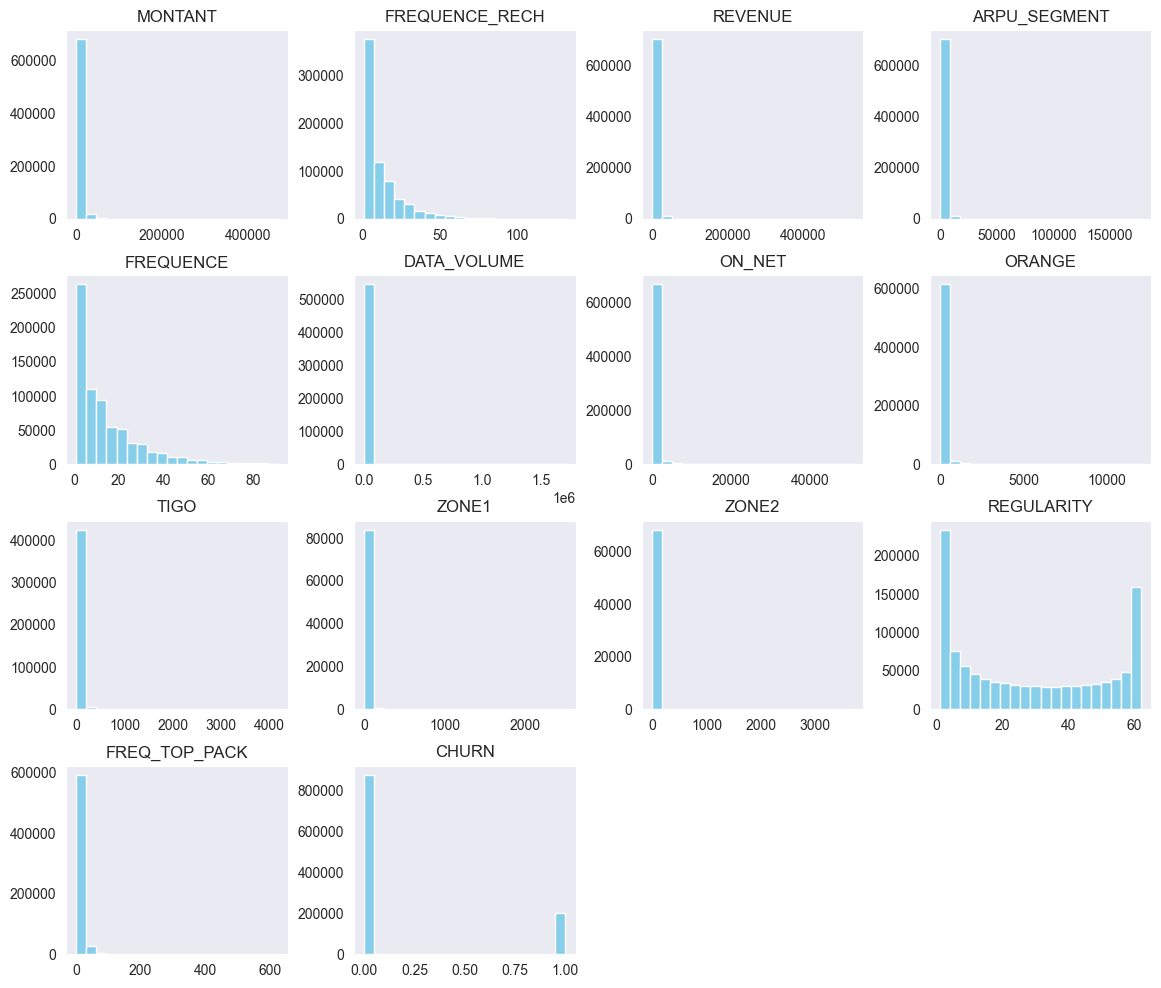

In [ ]:
# Visualize all integer columns
train.hist(figsize=(14,12), grid=False, bins=20, color='skyblue')
plt.show()

Target column 'CHURN' is imbalanced.

Column 'FREQUENCE' and 'FREQUENCE_RECH' are right skewed.

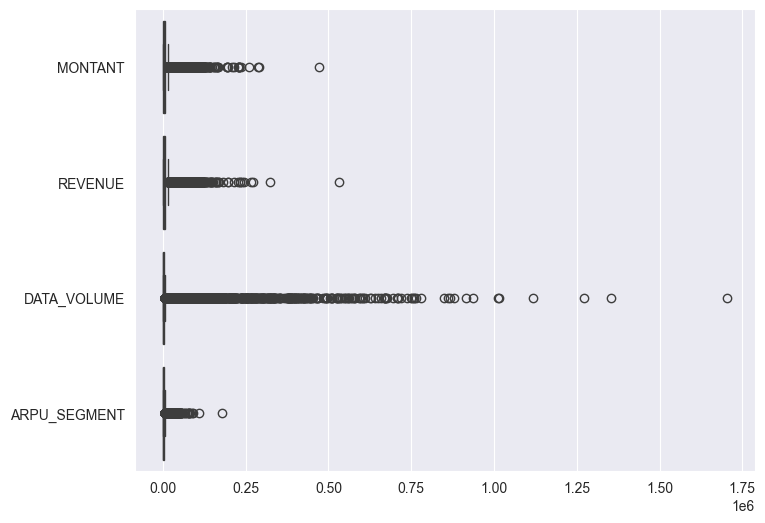

In [ ]:
#Check outliers in numerical columns using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=train[['MONTANT', 'REVENUE', 'DATA_VOLUME', 'ARPU_SEGMENT']], orient='h')
plt.show()

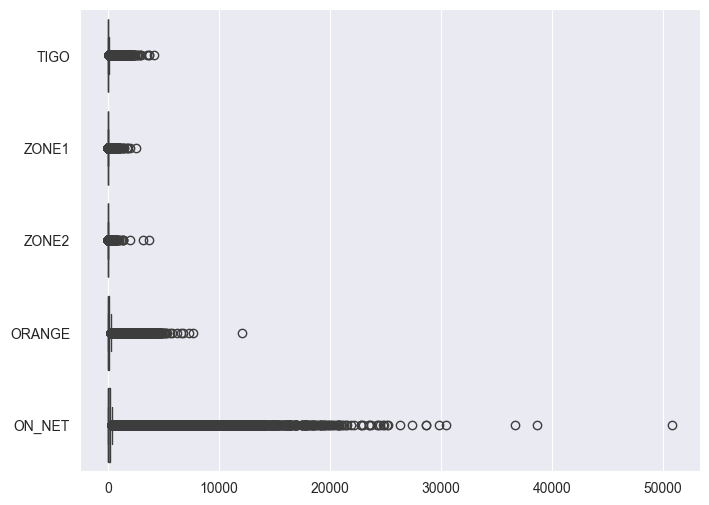

In [ ]:
#Check outliers in numerical columns using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=train[['TIGO', 'ZONE1', 'ZONE2', 'ORANGE', 'ON_NET']], orient='h')
plt.show()

All numerical columns have outliers except 'REGULARITY' column

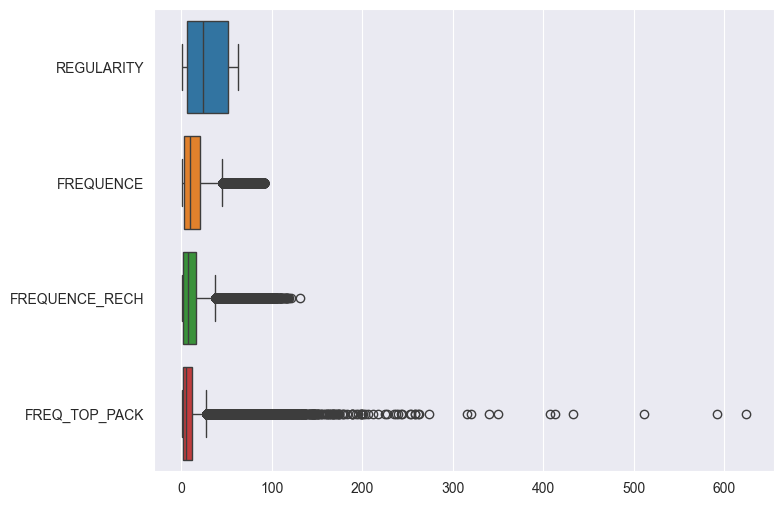

In [ ]:
#Check outliers in numerical columns using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=train[['REGULARITY', 'FREQUENCE', 'FREQUENCE_RECH', 'FREQ_TOP_PACK',]], orient='h')
plt.show()

In [286]:
#iDENTIFY numerical colmns
numerical_columns = train.select_dtypes(include='number')

#Exclude the target 'CHURN' from numerical cols
numerical_columnz = numerical_columns.drop(columns='CHURN')

Q1 = numerical_columnz.quantile(0.25)

Q3 =numerical_columnz.quantile(0.75)

IQR = Q3 - Q1

outliers_mask = (numerical_columnz < (Q1 - 1.5 * IQR)) | (numerical_columnz > (Q3 + 1.5 * IQR))

outliers_count_per_column = outliers_mask.sum()

print(f'Number of outliers per column:\n {outliers_count_per_column}')


Number of outliers per column:
 MONTANT            43778
FREQUENCE_RECH     40024
REVENUE            45587
ARPU_SEGMENT       45587
FREQUENCE          34892
DATA_VOLUME        70434
ON_NET            101315
ORANGE             65988
TIGO               49950
REGULARITY             0
FREQ_TOP_PACK      45523
dtype: int64


Check how many levels are involved in each of the categorical features (object)

Categorical features are-->[REGION, TENURE, MRG, TOP_PACK]

REGION
DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: count, dtype: int64


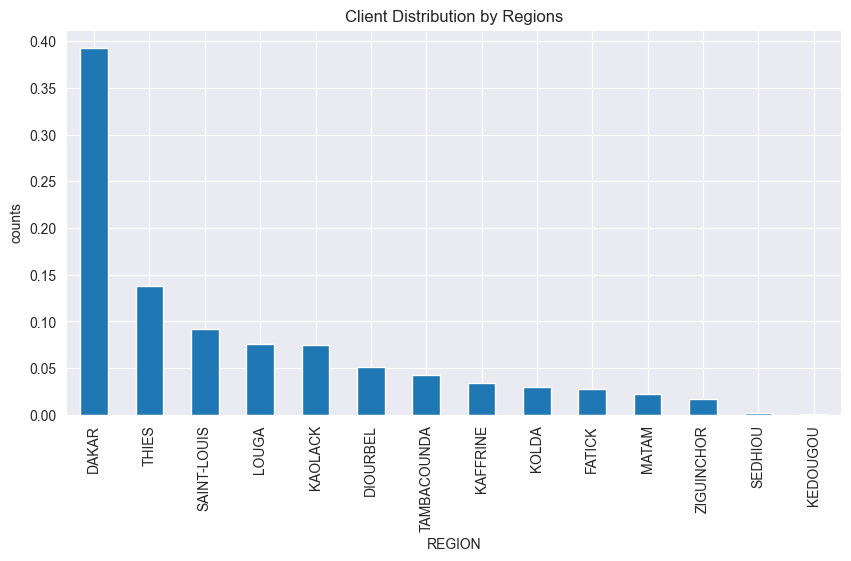

In [ ]:
# Region feature

print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')
plt.title('Client Distribution by Regions')
plt.show()

TENURE
K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: count, dtype: int64


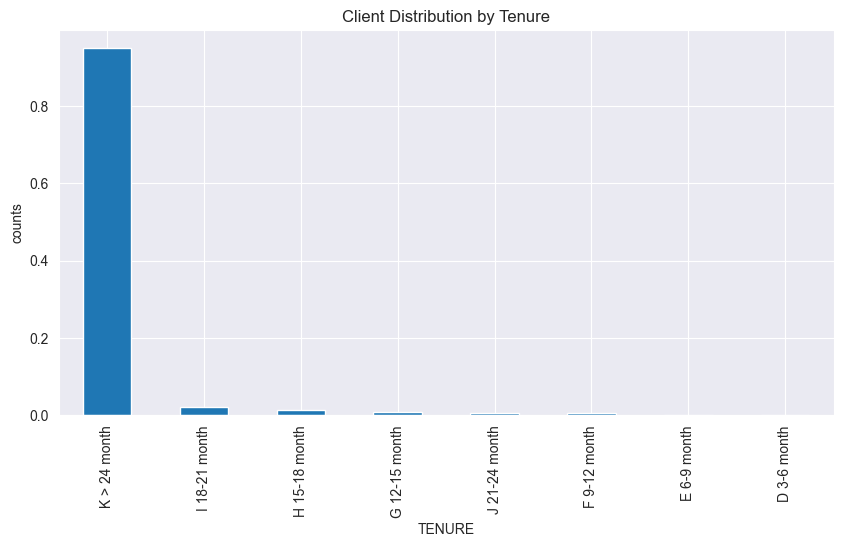

In [ ]:
# Tenure feature

print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')
plt.title('Client Distribution by Tenure')
plt.show();

Majority of clients have stayed with the telecom company for more than two years.

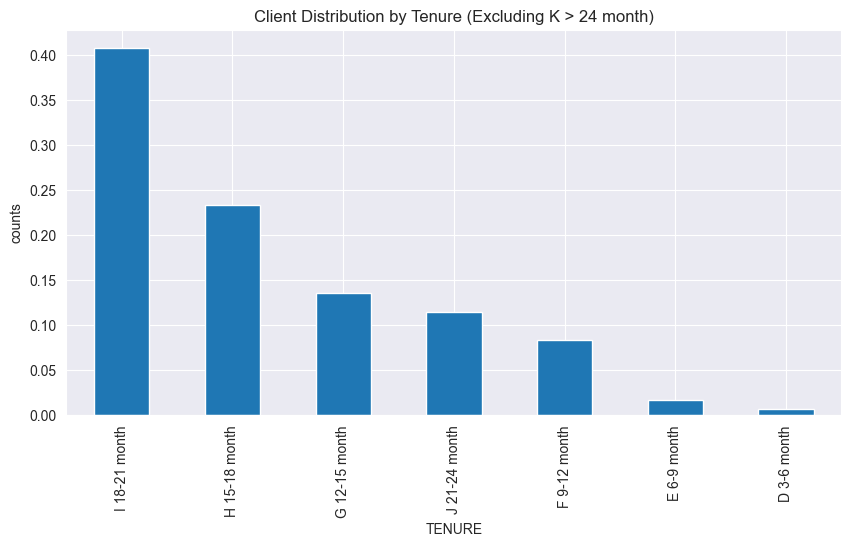

In [ ]:
# Client distribution by tenure excluding 'K > 24 month'
tenure_trimmed = train[train['TENURE']!='K > 24 month']

# Visualization
plt.figure(figsize=(10,5))
tenure_trimmed['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')
plt.title('Client Distribution by Tenure (Excluding K > 24 month)')
plt.show();


The higher the tenure category, the more the number of subscribed clients.

MRG
NO    1077024
Name: count, dtype: int64


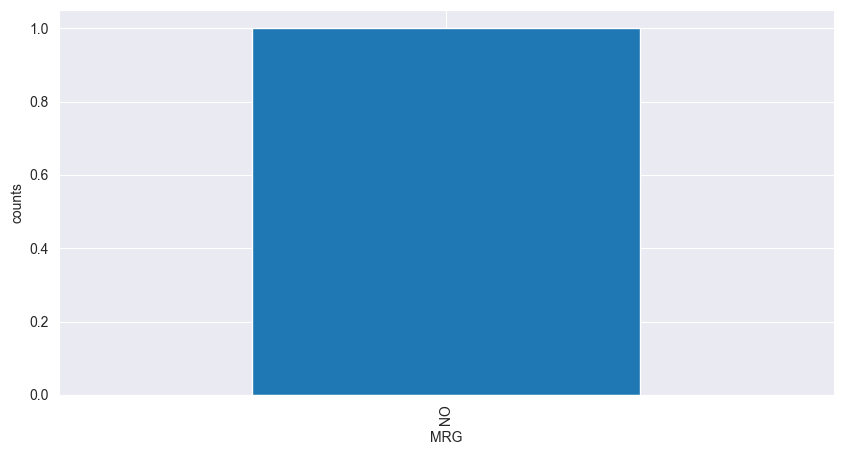

In [ ]:
#visualization of current clients who have not planned to leave 

print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')
plt.show();

* MRG column has only one unique value and doesn't offer any valuable information in the prediction of the target, 'CHURN'. This column will be deleted.



TOP_PACK
All-net 500F=2000F;5d             158779
On net 200F=Unlimited _call24H     76302
Data:490F=1GB,7d                   57679
Data: 100 F=40MB,24H               42515
Mixt 250F=Unlimited_call24H        33620
                                   ...  
150=unlimited pilot auto               1
FIFA_TS_weekly                         1
Data_Mifi_10Go_Monthly                 1
Data_Mifi_20Go                         1
200=unlimited pilot auto               1
Name: count, Length: 126, dtype: int64


Text(0.5, 0, 'TOP_PACK')

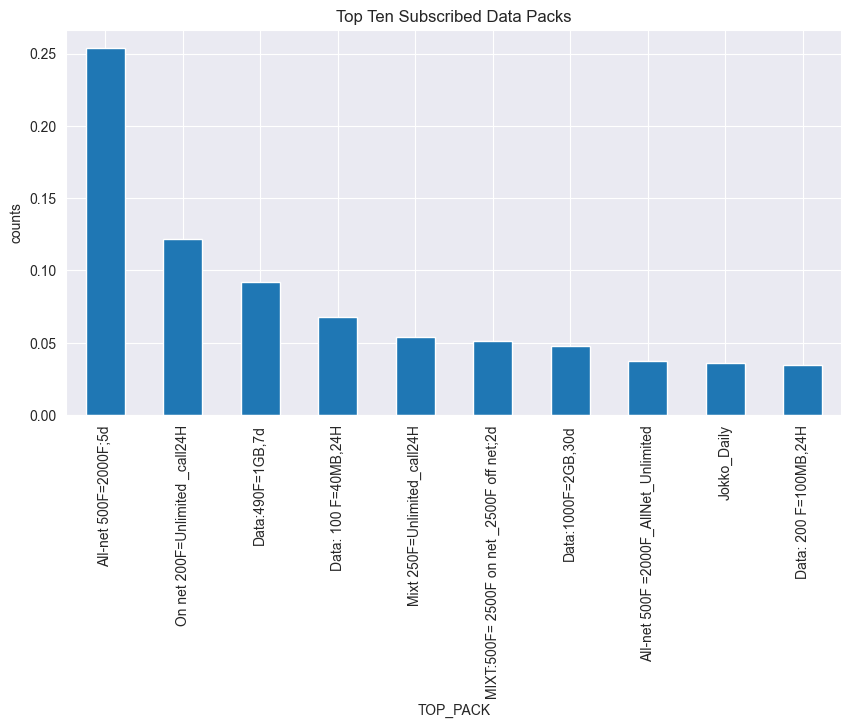

In [ ]:
#TOP_PACK Feature
print(train['TOP_PACK'].value_counts())

#Visualization of ten of the most subscribed data packs by customers
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.title('Top Ten Subscribed Data Packs')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

* During preprocessing, we'll drop 'TOP_PACK' column since it doesn't add valuable insights to the analysis.

* Also 'FREQ_TOP_PACK' column will capture the same information as 'TOP_PACK' column for our analysis.

CHURN
No     875031
Yes    201993
Name: count, dtype: int64


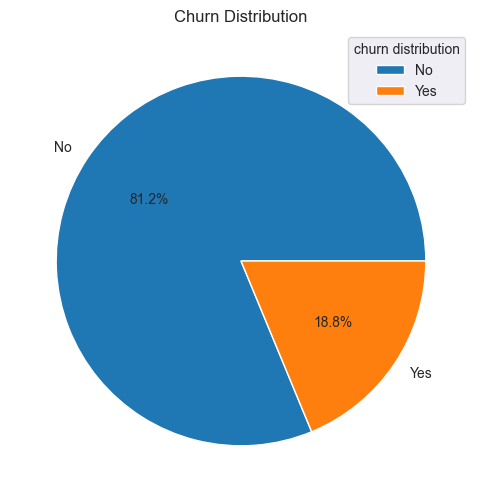

In [ ]:
# Churn feature
#Check if the predictor class is balanced 
churn_count = train['CHURN'].replace({0:'No', 1:'Yes'})
churn_count = churn_count.value_counts()

print(churn_count)

#Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.legend(title='churn distribution')
plt.show();

* Our target 'CHURN' column is not balanced in the dataset. 

* There are 875,031 customers who did not churn, representing 81.2% of the total customers. 

* Those customers who churned are 201,993, and represent 18.8% of total clients.

In [ ]:
#copy of train for visualization purposes
train_c = train.copy()

# map  0:'No' and 1:'Yes' in 'CHURN' column
train_c['CHURN'] = train_c['CHURN'].map({0:'No', 1:'Yes'})

Bivariate analysis

1. What is the relationship between tenure and churn? Are customers who have stayed longer with the telecom company least likely to churn?

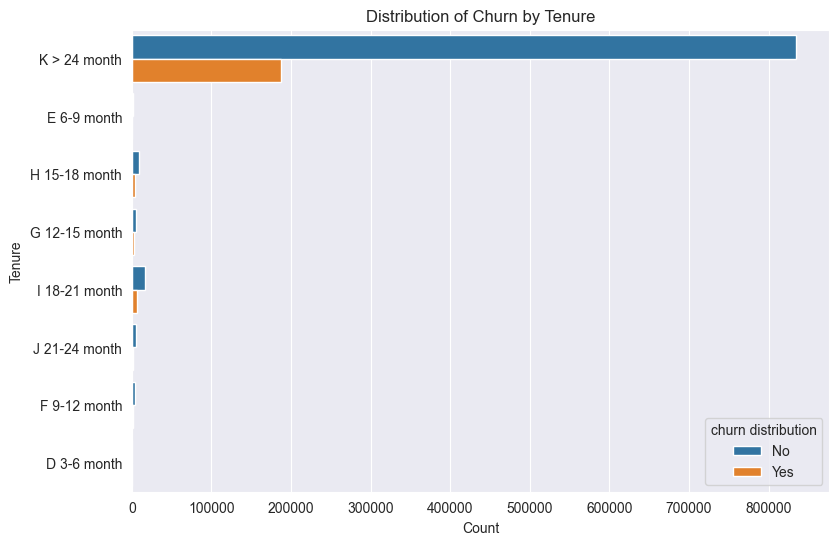

In [287]:
#creating horizontal bar plot
plt.figure(figsize=(9, 6))
sns.countplot(data=train_c, y='TENURE', hue='CHURN')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Tenure')
plt.title('Distribution of Churn by Tenure')
plt.legend(loc='lower right', title ='churn distribution')
#show the plot
plt.show()

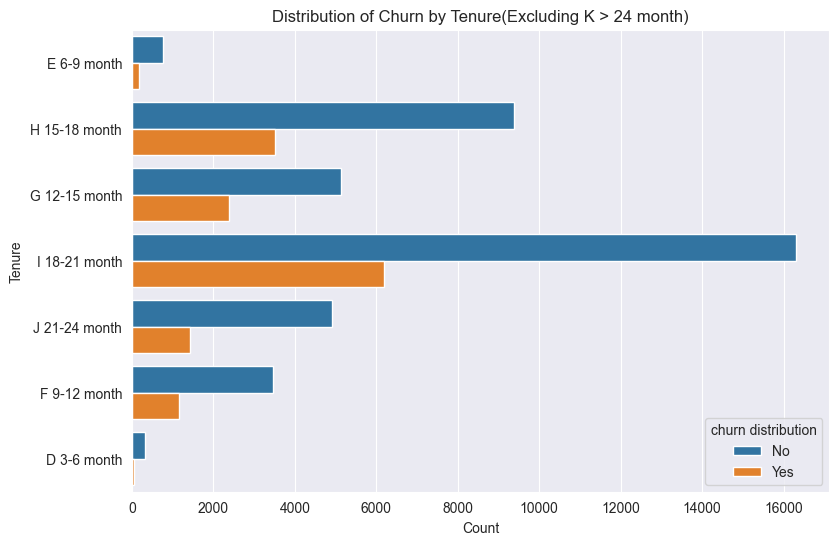

In [288]:
#Filtering out 'K > 24 month' from 'TENURE' column 
filtered_data = train_c[train_c['TENURE']!='K > 24 month']

#creating horizontal bar plot
plt.figure(figsize=(9, 6))
sns.countplot(data = filtered_data, y='TENURE', hue='CHURN')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Tenure')
plt.title('Distribution of Churn by Tenure(Excluding K > 24 month)')
plt.legend(loc='lower right', title='churn distribution')
#show the plot
plt.show()

Insights from graphs above

* Tenure > 24 month churned most, followed by 18-21 month, 15-18 month, 12-15 month, 21-24 month, 9-12 month, 6-9 month, and 3-6 month respectively.

* It is recommended that management further investigate why there is such a high attrition in customers who have stayed over 24 months with the company. This can be done through surveys on customers expectations so that management can design promotiona packages that will reduce this rate.


2. What is the relationship between Region and Churn? Are there regions with higher churn rates than others? 

REGION       CHURN
DAKAR        No       251328
             Yes        4931
DIOURBEL     No        32645
             Yes         919
FATICK       No        17532
             Yes         243
KAFFRINE     No        21913
             Yes         154
KAOLACK      No        47294
             Yes        1204
KEDOUGOU     No          493
             Yes          21
KOLDA        No        19248
             Yes         216
LOUGA        No        48880
             Yes         799
MATAM        No        14348
             Yes         302
SAINT-LOUIS  No        59167
             Yes         728
SEDHIOU      No         1469
             Yes          84
TAMBACOUNDA  No        27125
             Yes         437
THIES        No        88672
             Yes        1499
ZIGUINCHOR   No        10733
             Yes         303
Name: count, dtype: int64


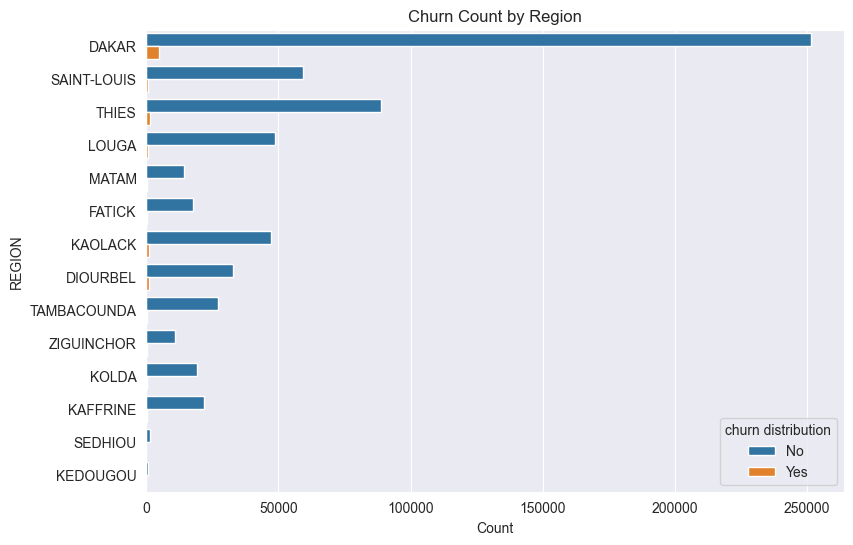

In [289]:
print(train_c.groupby('REGION')['CHURN'].value_counts())

#creating horizontal bar plot
plt.figure(figsize=(9, 6))
sns.countplot(data = train_c, y='REGION', hue='CHURN')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Churn Count by Region')
plt.legend(loc='lower right', title='churn distribution')
#show the plot
plt.show()

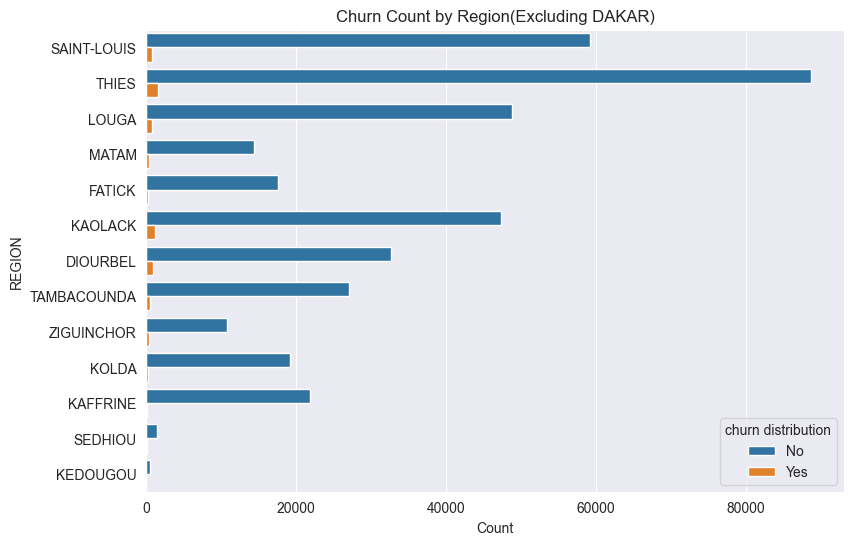

In [290]:
#Filtering out 'DAKAR' Region
filtered_data1 = train_c[train_c['REGION']!='DAKAR']

#creating horizontal bar plot
plt.figure(figsize=(9, 6))
sns.countplot(data = filtered_data1, y='REGION', hue='CHURN')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Churn Count by Region(Excluding DAKAR)')
plt.legend(loc='lower right', title='churn distribution')
#show the plot
plt.show()

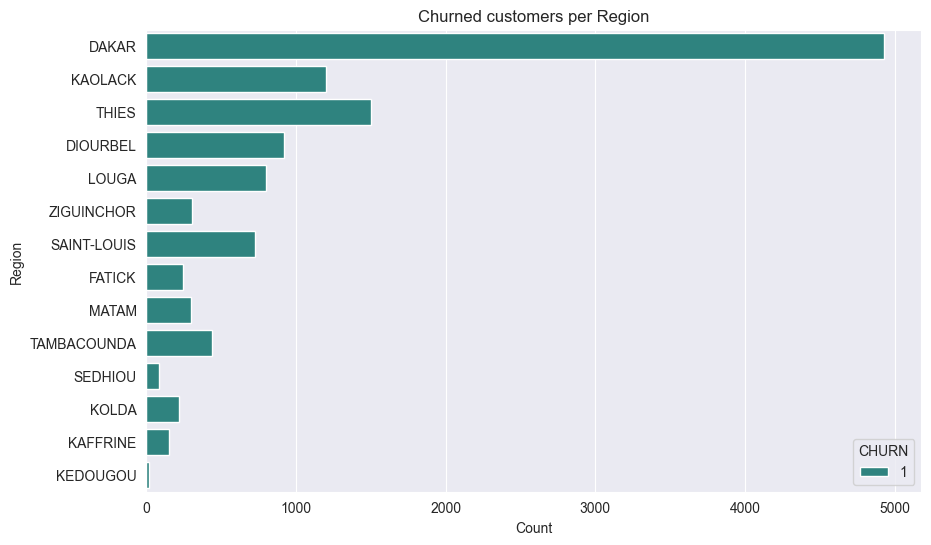

In [308]:
# Filter rows where 'CHURN' is equal to 1
churned_data = train[train['CHURN'] == 1]

# Plot a horizontal bar plot for 'Region' with hue='Churn'
plt.figure(figsize=(10, 6))
sns.countplot(y='REGION', hue='CHURN', data=churned_data, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Churned customers per Region')
plt.show()

DAKAR followed by THIES are the regions having highest positive churn count. This can be explained by the high number of clients in both regions where some are most likely to churn.

In [311]:
## Region churn in proportion to how many customers are in the region

#region_cust_churn_perc
region_cust_churn_percent = (train.groupby(['REGION'])['CHURN'].mean()*100).reset_index()

# Sort the DataFrame in descending order based on churn percentage
region_cust_churn_percent = region_cust_churn_percent.sort_values(by='CHURN', ascending=False)

# Remove the index
region_cust_churn_percent.reset_index(drop=True, inplace=True)

# Print the sorted DataFrame
print(region_cust_churn_percent)

         REGION     CHURN
0       SEDHIOU  5.408886
1      KEDOUGOU  4.085603
2    ZIGUINCHOR  2.745560
3      DIOURBEL  2.738053
4       KAOLACK  2.482577
5         MATAM  2.061433
6         DAKAR  1.924225
7         THIES  1.662397
8         LOUGA  1.608325
9   TAMBACOUNDA  1.585516
10       FATICK  1.367089
11  SAINT-LOUIS  1.215460
12        KOLDA  1.109741
13     KAFFRINE  0.697875


* From the above we see that though Dakar churned most, proportionately, Sedhiou and Kedougou churned most at 5.4% and 4.08 respectively. However, Dakar and other regions with high client revenues must be kept in mind when making decisions.

3. Deos regularity and frequence have a correlation to churn? Are customers who are likely to churn have a lower frequence and regularity number?

In [ ]:
#copy of train data to visualize numeric data
train_d = train.copy()

#filter numeric columns from train data
numeric_data = train_d.select_dtypes(include=['int64', 'float64'])

#List of numeric column names
column_names = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
                 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN']

# Drop rows with missing values(NAN) from numeric columns
numeric_data.dropna(subset=column_names, inplace=True)

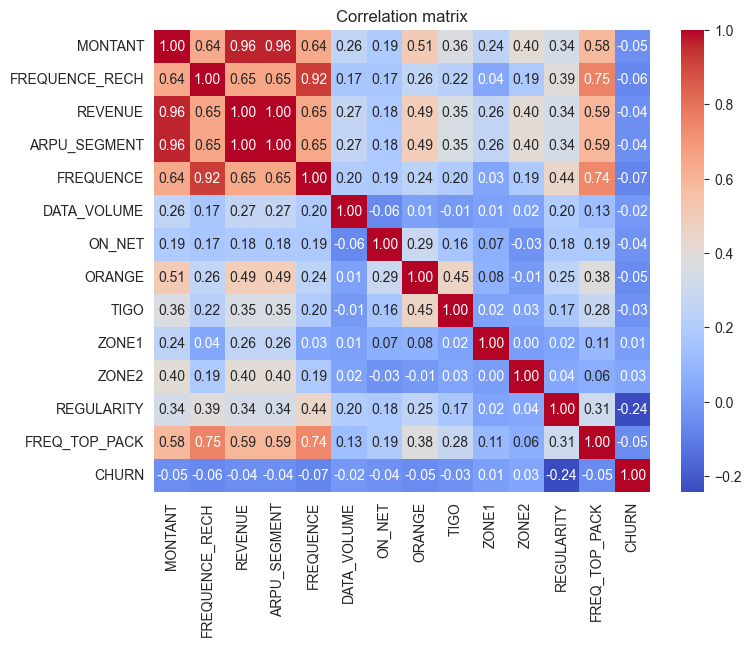

In [ ]:
#Plotting a correlation matrix
correlation_matrix = numeric_data.corr()
# visualize plot
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

Correlation matrix shows that all numerical variables have a weak relationship with target churn. 'REGULARITY' has a high correlation of 0.24 in comparison to the rest.

Bar chart of aggregate revenue by region

         REGION       REVENUE
0         DAKAR  1.636719e+09
12        THIES  4.461914e+08
9   SAINT-LOUIS  3.123455e+08
7         LOUGA  1.967163e+08
4       KAOLACK  1.961815e+08
11  TAMBACOUNDA  1.386487e+08
1      DIOURBEL  9.503862e+07
3      KAFFRINE  9.018552e+07
6         KOLDA  8.924239e+07
2        FATICK  6.731594e+07
8         MATAM  5.908974e+07
13   ZIGUINCHOR  4.953175e+07
10      SEDHIOU  5.733573e+06
5      KEDOUGOU  2.491452e+06


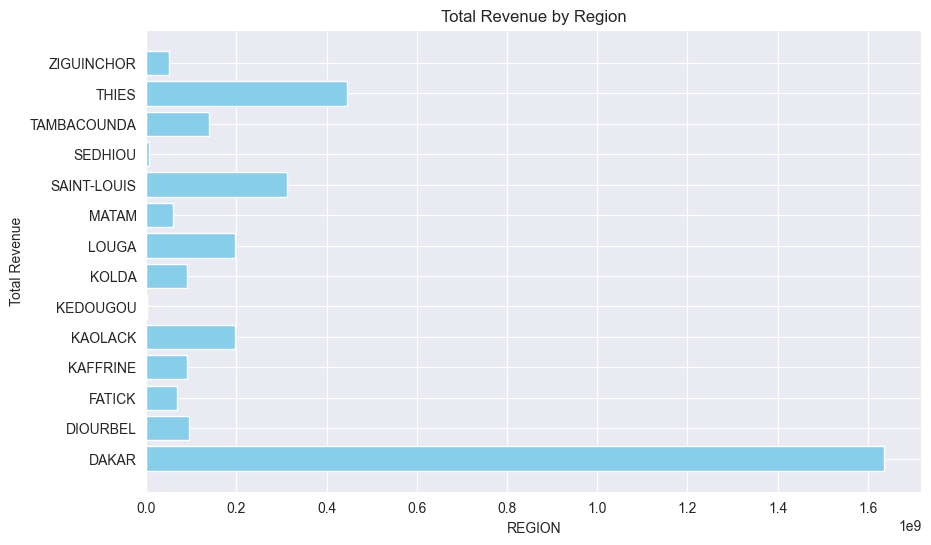

In [295]:
# Plotting a bar chart for aggregated revenue by region
# Aggregate revenue based on regions
region_revenue = train_d.groupby('REGION')['REVENUE'].sum().reset_index()

print(region_revenue.sort_values(by='REVENUE', ascending=False))

plt.figure(figsize=(10, 6))
plt.barh(region_revenue['REGION'], region_revenue['REVENUE'], color='skyblue')
plt.xlabel('REGION')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.show()

* Dakar was the region with the highest monthly revenue (over 1.6 billion) by clients, followed by Thies with approximately 500 million. Saint-Louis, Louga, and Koalack follows respectively. Kedougou was the lowest in terms of revenue.

Visualize tenure based on regions

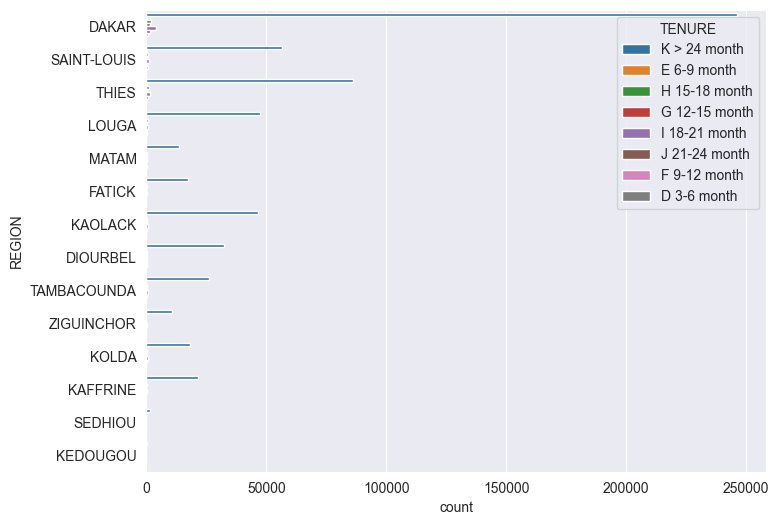

In [298]:
# Visualize tenure based on regions
# This shows that K > 24 month is the highest representation in all regions with DAKAR leading
plt.figure(figsize=(8, 6))
sns.countplot(y='REGION', hue='TENURE', data=train_d)
plt.show()

* Visualizing the different tenures based on regions, the 'K > 24 month' was the highest count for almost all regions. This shows that most customers have stayed for over 24 months. Dakar alone counts nearly 250,000 clients followed by about 80,000 customers in Thies.

Distribution of revenue based on tenure

          TENURE       REVENUE
7   K > 24 month  3.768535e+09
5  I 18-21 month  6.874135e+07
4  H 15-18 month  3.599267e+07
6  J 21-24 month  2.156604e+07
3  G 12-15 month  2.038241e+07
2   F 9-12 month  1.478173e+07
1    E 6-9 month  4.410933e+06
0    D 3-6 month  5.932790e+05


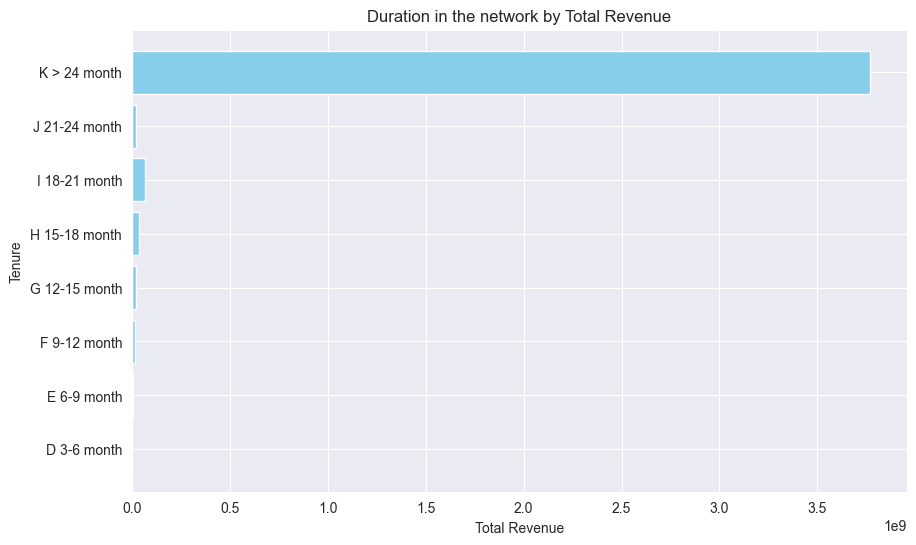

In [301]:
# Plotting a bar chart for aggregated revenue by tenure
# Aggregate revenue based on tenure
tenure_revenue = train_d.groupby('TENURE')['REVENUE'].sum().reset_index()

print(tenure_revenue.sort_values(by='REVENUE', ascending=False))

plt.figure(figsize=(10, 6))
plt.barh(tenure_revenue['TENURE'], tenure_revenue['REVENUE'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Tenure')
plt.title('Duration in the network by Total Revenue')
plt.show()

* When we sum the total revenue based on the duration in the network, we observe that those who have stayed in the network more than 24 months has the highest aggregate total revenue of over 3.5 billion. The next tenure ranges that comes close is '18-21 months' which is less than 100million.

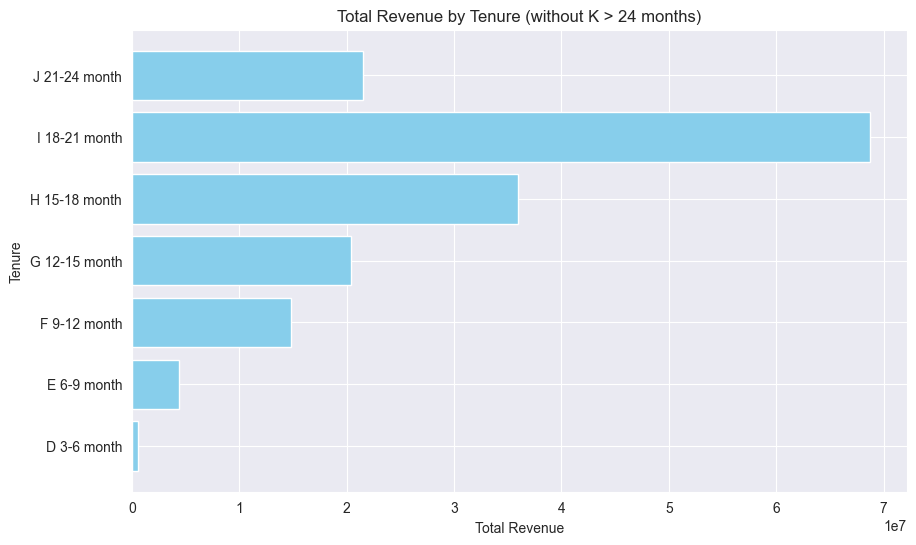

In [302]:
# Plotting a bar chart for aggregated revenue by tenure without K > 24 month
# Aggregate revenue based on tenure
filtered_data = train_d[train_d['TENURE'] != 'K > 24 month']

tenure_revenue = filtered_data.groupby('TENURE')['REVENUE'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(tenure_revenue['TENURE'], tenure_revenue['REVENUE'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Tenure')
plt.title('Total Revenue by Tenure (without K > 24 months)')
plt.show()

* Tenure ranges '18-21 month', '15-18 month', '21-24 month' have the highest aggregate revenue respectively after 'K > 24 month'. '3-6 month' is the lowest aggregate revenue.

 Which top up amount churned most?

In [328]:
topup_churn = churned_data.groupby(['MONTANT'])['CHURN'].value_counts().reset_index(name='COUNT')

# Sort the DataFrame based on the count in descending order
topup_churn = topup_churn.sort_values(by='COUNT', ascending=False)

# Remove the index
topup_churn.reset_index(drop=True, inplace=True)

# Print the top 10 entries
print(topup_churn.head(10))

   MONTANT  CHURN  COUNT
0    500.0      1   6612
1   1000.0      1   3667
2    200.0      1   2871
3    100.0      1   1824
4   1500.0      1   1586
5   2000.0      1   1452
6   3000.0      1    869
7    300.0      1    803
8   2500.0      1    769
9    250.0      1    702


In [329]:
topup_churn.tail(10)

,MONTANT,CHURN,COUNT
564,16550.0,1,1
565,16650.0,1,1
566,16750.0,1,1
567,16800.0,1,1
568,16900.0,1,1
569,16950.0,1,1
570,17250.0,1,1
571,17350.0,1,1
572,17650.0,1,1
573,286500.0,1,1


Visualize top_amount that was most churned by clients

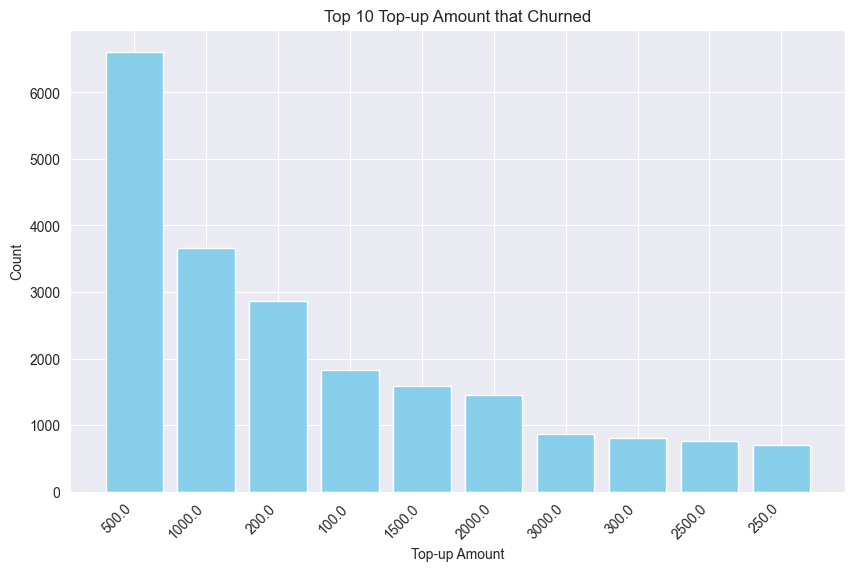

In [343]:
topup_churn = churned_data.groupby(['MONTANT'])['CHURN'].value_counts().reset_index(name='COUNT')

# Sort the DataFrame based on the count in descending order
topup_churn = topup_churn.sort_values(by='COUNT', ascending=False)

# Take the top 10 entries
top_10_entries = topup_churn.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_entries)), top_10_entries['COUNT'], color='skyblue')
plt.xlabel('Top-up Amount')
plt.ylabel('Count')
plt.title('Top 10 Top-up Amount that Churned')
plt.xticks(range(len(top_10_entries)), top_10_entries['MONTANT'].astype(str), rotation=45, ha='right')
#plt.tight_layout()
plt.show()

From the graph above, it shows that top-up amount of 500 churned most. This is followed by 1000, 200, and 100 respectively.

In [344]:
top_10_entriez = churned_data.groupby(['FREQ_TOP_PACK'])['CHURN'].value_counts().head(10).reset_index(name='Churn_count')

top_10_entriez = top_10_entriez.sort_values(by='Churn_count', ascending=False)

top_10_entriez

,FREQ_TOP_PACK,CHURN,Churn_count
0,1.0,1,10844
1,2.0,1,4381
2,3.0,1,2429
3,4.0,1,1582
4,5.0,1,1148
5,6.0,1,809
6,7.0,1,670
7,8.0,1,519
8,9.0,1,403
9,10.0,1,351


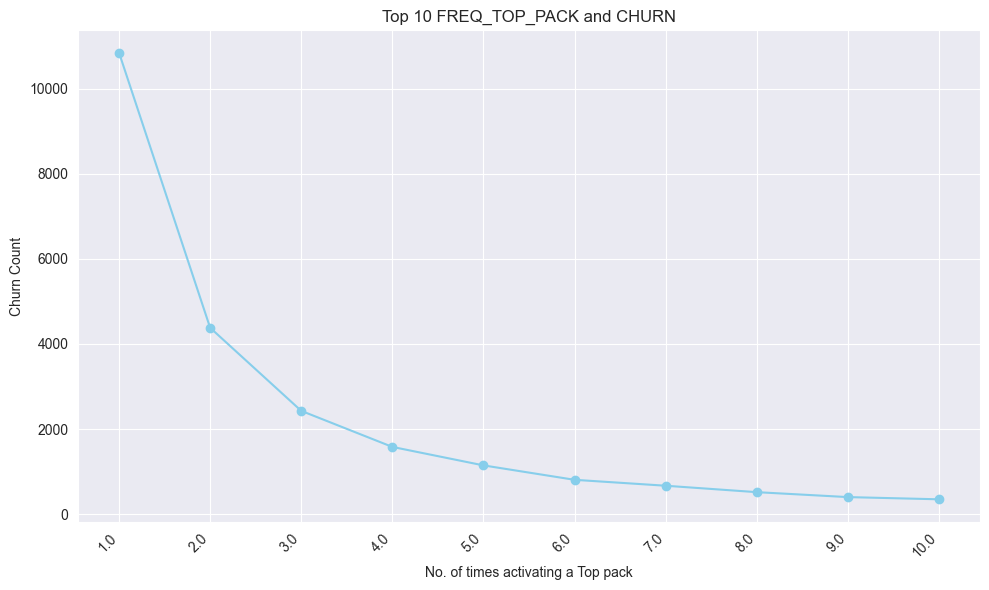

In [345]:
# Plotting a line chart for top 10 entries
plt.figure(figsize=(10, 6))
plt.plot(top_10_entriez['FREQ_TOP_PACK'].astype(str), top_10_entriez['Churn_count'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('No. of times activating a Top pack')
plt.ylabel('Churn Count')
plt.title('Top 10 FREQ_TOP_PACK and CHURN')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* The graph above shows that customers who least activated top packs were more likely to churn. On average when sum of the number of times customers activate a top pack decreases, churn count increases.

<Figure size 1200x800 with 0 Axes>

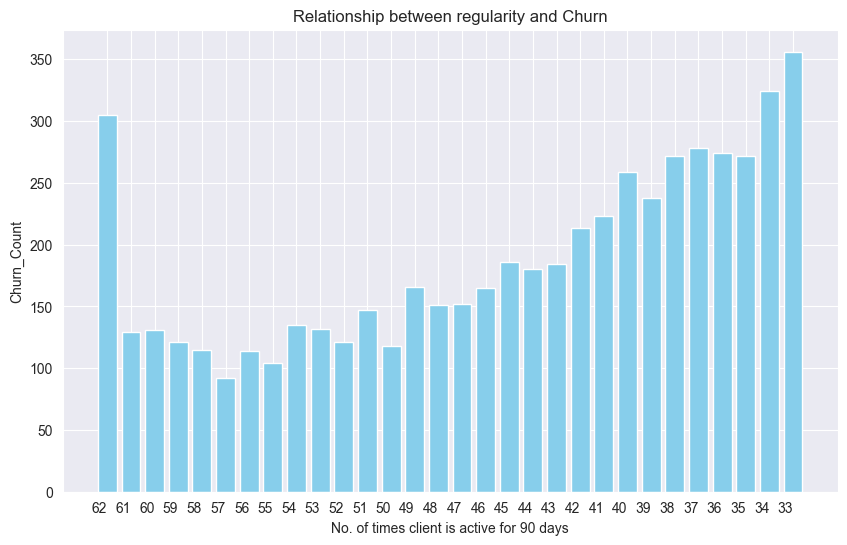

In [362]:
plt.figure(figsize=(12, 8))
regularity_filt =churned_data.groupby(['REGULARITY'])['CHURN'].value_counts().reset_index(name='churn_count')
regularity_filt = regularity_filt.sort_values(by='REGULARITY', ascending=False)
regularity_filt

# Take the top 30 entries
top_10_entriezz = regularity_filt.head(30)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_entriezz)), top_10_entriezz['churn_count'], color='skyblue')
plt.xlabel('No. of times client is active for 90 days')
plt.ylabel('Churn_Count')
plt.title('Relationship between regularity and Churn')
plt.xticks(range(len(top_10_entriezz)), top_10_entriezz['REGULARITY'].astype(str), ha='right')
#plt.tight_layout()
plt.show();

The bar graph shows that most customers who are active have a low churn count

## Hypothesis test

**Null Hypothesis**: There is no association between tenure categories and churn

**Alternative Hypothesis**: There is significant association between tenure categories and churn

In [305]:
# Create a contigency table

contingency_table = pd.crosstab(train_d['TENURE'], train_d['CHURN'])

print(contingency_table)

print()

chi2, p, dof, expected = chi2_contingency(contingency_table)
print()
print(f'Chi-square Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of Freedom: {dof}')

print()
if p < 0.05:
    print('There is a significant association between tenure category and churn')
else:
    print('There is no association between tenure category and churn')

CHURN               0       1
TENURE                       
D 3-6 month       333      54
E 6-9 month       767     162
F 9-12 month     3459    1145
G 12-15 month    5125    2395
H 15-18 month    9389    3524
I 18-21 month   16308    6186
J 21-24 month    4910    1414
K > 24 month   834740  187113


Chi-square Statistic: 2898.5207691813353
P-value: 0.0
Degrees of Freedom: 7

There is a significant association between tenure category and churn


Insights in the hypothesis test:

* Since different tenure groups impacts churn significantly, it could suggest that certain groups are more or less likely to churn.

* Higher average tenure might indicate higher churn risk, while lower average tenure might suggest lower churn risk.

Retention Strategies:

* A significant difference might prompt the development or enhancement of retention strategies.
* Strategies could include personalized offers, customer engagement initiatives, or improvements in customer service.

Relationship of other categorical variables to churn

In [ ]:
# #Select categorical variables
categorical_data = train_d.select_dtypes(include='object')

#define categorical columns
categorical_columns = ['user_id', 'REGION', 'MRG', 'TOP_PACK']
#Drop 'TENURE' column
categorical_filtered = categorical_data.drop(columns='TENURE', axis=1)
# Drop rows with missing values
categorical_filtered = categorical_filtered.dropna(subset=categorical_columns)

# Create a contigency table
for column in categorical_filtered:
    contingency_table = pd.crosstab(categorical_filtered[column], train_d['CHURN'])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'Chi-square Statistic for {column}: {chi2}')
    print(f'P-value for {column}: {p}')
    print(f'Degrees of Freedom for {column}: {dof}')

    if p < 0.05:
        print(f'There is a significant association between {column} and churn')
    else:
        print(f'There is no association between {column} and churn')

    print()

Chi-square Statistic for user_id: 500632.99999999965
P-value for user_id: 0.4993355166121043
Degrees of Freedom for user_id: 500632
There is no association between user_id and churn

Chi-square Statistic for REGION: 403.5669585571562
P-value for REGION: 3.9458474562426094e-78
Degrees of Freedom for REGION: 13
There is a significant association between REGION and churn

Chi-square Statistic for MRG: 0.0
P-value for MRG: 1.0
Degrees of Freedom for MRG: 0
There is no association between MRG and churn

Chi-square Statistic for TOP_PACK: 1090.1505754541074
P-value for TOP_PACK: 1.6591178699564323e-159
Degrees of Freedom for TOP_PACK: 113
There is a significant association between TOP_PACK and churn



## Preprocessing

Drop of unecessary columns in both train & test set

In [ ]:
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [ ]:
#We will drop TOP_PACK, 'ZONE1', 'ZONE2', and MRG. They have less contribution in prediction of the target.
# TOP_PACK has collinearity to 'FREQ_TOP_PACK' that we will use.
# 'ZONE1', 'ZONE2' have more than 90% of missing values
#We will also replace the missing values for the numerical columns with their means (averages) 
# We will fill categorical columns with their mode

train.drop(columns=['MRG', 'TOP_PACK', 'ZONE1', 'ZONE2'], inplace=True) #drop these columns

In [ ]:
#check if columns are dropped in train set
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [ ]:
test.drop(columns=['MRG', 'TOP_PACK', 'ZONE1', 'ZONE2'], inplace=True)

In [ ]:
#check if columns are dropped in test set
test.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

## Machine Learning

In [ ]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(1077024, 13)
(1077024,)
(190063, 13)


# Preprocessing

In [248]:
#dataframe has both numerical and categorical columns
#categorical columns
categorical_cols = ['TENURE', 'REGION']  # Add 'REGION' to the list
numerical_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']


# tenure mapping 'tenure' category

tenure_mapping = {'D 3-6 month':0,
                  'E 6-9 month':1,
                  'F 9-12 month':2,
                  'G 12-15 month':3,
                  'H 15-18 month':4,
                  'I 18-21 month':5,
                  'J 21-24 month':6,
                  'K > 24 month': 7 
}

# Define categories for 'TENURE' and 'REGION'
tenure_categories = list(tenure_mapping.keys())
region_categories = ['DAKAR', 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU']

encoder = LabelEncoder()

# Create separate transformers for 'TENURE' and 'REGION'
tenure_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[tenure_categories]))
])

region_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', categories=[region_categories]))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('region', region_transformer, ['REGION']),
    ('tenure', tenure_transformer, ['TENURE']),
    ('num', numerical_transformer, numerical_cols)
])


In [249]:
preprocessor

ColumnTransformer(transformers=[('region',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(categories=[['DAKAR',
                                                                             'SAINT-LOUIS',
                                                                             'THIES',
                                                                             'LOUGA',
                                                                             'MATAM',
                                                                             'FATICK',
                                                                             'KAOLACK',
                                                                             'DIOURBEL',
                                                                             'TAMBACOUNDA',
                                                                             'ZIGUINCHOR',
                                                                             'KOLDA',
                                                                             'KAFFRINE',
                                                                             'SEDHIOU',
                                                                             'KEDOUGOU']],
                                                                handle_unknown='ignore'))]),
                                 ['REGION']),
                                ('tenure',
                                 Pipeline...
                                                                              'month',
                                                                              'I '
                                                                              '18-21 '
                                                                              'month',
                                                                              'J '
                                                                              '21-24 '
                                                                              'month',
                                                                              'K '
                                                                              '> '
                                                                              '24 '
                                                                              'month']]))]),
                                 ['TENURE']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['MONTANT', 'FREQUENCE_RECH', 'REVENUE',
                                  'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
                                  'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
                                  'FREQ_TOP_PACK'])])

In [250]:
#Fit and transform the training data using the preprocessor
#Preprocessing training set
X_train_transformed = preprocessor.fit_transform(x) 

#Transform the test data using the preprocessor
test_data_transformed = preprocessor.transform(test) 

In [243]:
#Check on class distribution of target variable before balancing

print(f'Class distribution before balancing dataset:')
print(y.value_counts())

Class distribution before balancing dataset:
CHURN
0    875031
1    201993
Name: count, dtype: int64


In [251]:
# Create DataFrames for the transformed datas
X_train_t = pd.DataFrame(X_train_transformed )
test_t = pd.DataFrame(test_data_transformed)

# Define the column names
onehot_features = ['DAKAR', 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM',
                           'FATICK', 'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA',
                           'ZIGUINCHOR', 'KOLDA', 'KAFFRINE', 'SEDHIOU',
                           'KEDOUGOU']

ordinal_feature = ['tenure']

# Get the one-hot encoder transformer
onehot_encoder = preprocessor.named_transformers_['region']['onehot']

# Get the ordinal encoder transformer
ordinal_encoder = preprocessor.named_transformers_['tenure']['ordinal']

# Access feature names (if available) for one-hot encoder
if hasattr(onehot_encoder, 'get_feature_names_out'):
    cat_columns_onehot = onehot_encoder.get_feature_names_out(['REGION'])
    # Combine the categorical and numerical column names
    #all_feature_names_onehot = np.concatenate([cat_columns_onehot])

# Access feature names (if available) for ordinal encoder
if hasattr(ordinal_encoder, 'get_feature_names_out'):
    cat_columns_ordinal = ordinal_encoder.get_feature_names_out(['TENURE'])
    # Combine the categorical and numerical column names
    #all_feature_names_ordinal = np.concatenate([cat_columns_ordinal])

# Combine all feature names
all_feature_names = np.concatenate([cat_columns_onehot, cat_columns_ordinal, numerical_cols])


# # If the transformers don't have get_feature_names_out, use the original column names
# else:
#     all_feature_names = np.concatenate([['REGION', 'TENURE'], numerical_cols])

# all_columns = list(cat_columns) + numerical_cols
X_train_t.columns = all_feature_names
test_t.columns = all_feature_names

In [257]:
#Use of SMOTE to generate synthetic values for the minority class

smote = SMOTE(random_state=40)
X_train_resampled , y_train_resampled = smote.fit_resample(X_train_t, y)

print(f'Class distribution after balancing dataset: \n {y_train_resampled.value_counts()}')

Class distribution after balancing dataset: 
 CHURN
0    875031
1    875031
Name: count, dtype: int64


In [258]:
#Split training data into train and' test split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.5,random_state=1)

print(f'X_train shape: {X_train.shape}\n y_train shape: {y_train.shape}\n X_test shape: {X_test.shape}\n y_test shape: {y_test.shape}')

X_train shape: (875031, 26)
 y_train shape: (875031,)
 X_test shape: (875031, 26)
 y_test shape: (875031,)


In [260]:
#Further split X_train and y_train into train and validation sets

In [261]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

print(f'X_train shape: {X_train.shape}\n y_train shape: {y_train.shape}\n X_test shape: {X_val.shape}\n y_test shape: {y_val.shape}')

X_train shape: (612521, 26)
 y_train shape: (612521,)
 X_test shape: (262510, 26)
 y_test shape: (262510,)


## Modelling

In [262]:
#List of models for training process

#models = [GaussianNB(), RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42)]
models = [GradientBoostingClassifier(random_state=42), RandomForestClassifier(random_state=42)]
metrics = []

# Iterating over models 
for model in models:
    # Create a pipeline containing the preprocesor and the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    # Fit pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_val)

    # Calculate the metrics
    accuracy  = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_pred)

    # Append the metrics to the list

    metrics.append({'model':model.__class__.__name__,
                'Accuracy Score':accuracy,
                'F1 Score': f1,
                'precision_score': precision,
                'recall_score': recall,
                'ROC AUC Score': roc,})

#Create a Dataframe of model performance
model_performance = pd.DataFrame(metrics)
model_performance = model_performance.sort_values(by='ROC AUC Score', ascending=False)
model_performance_styled = model_performance.style.background_gradient(cmap='tab10')
model_performance_styled

,model,Accuracy Score,F1 Score,precision_score,recall_score,ROC AUC Score
1,RandomForestClassifier,0.881924,0.887121,0.849982,0.927653,0.881910
0,GradientBoostingClassifier,0.858337,0.863743,0.832244,0.897721,0.858324


Classification report

model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85    120882
           1       0.90      0.83      0.86    141628

    accuracy                           0.86    262510
   macro avg       0.86      0.86      0.86    262510
weighted avg       0.86      0.86      0.86    262510



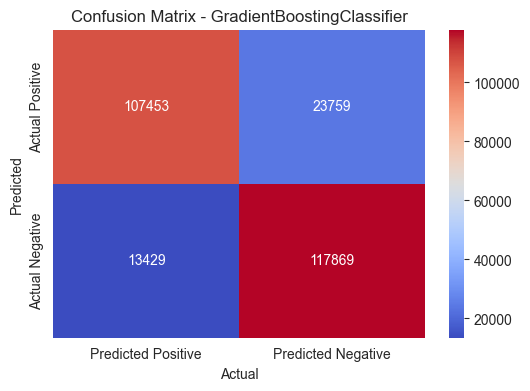

----------------------------------------------------------------------
model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88    119214
           1       0.93      0.85      0.89    143296

    accuracy                           0.88    262510
   macro avg       0.88      0.89      0.88    262510
weighted avg       0.89      0.88      0.88    262510



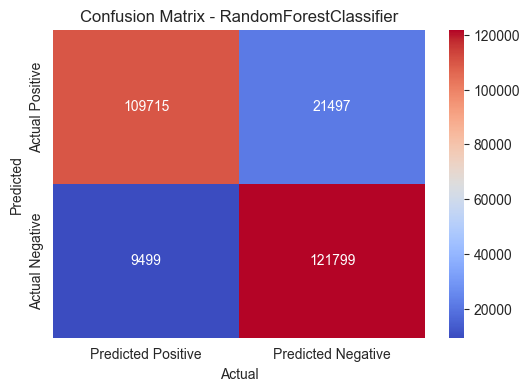

----------------------------------------------------------------------


In [263]:
models = [GradientBoostingClassifier(random_state=42), RandomForestClassifier(random_state=42)]
metrics = []

# Iterating over models 
for model in models:
    # Create a pipeline containing the preprocesor and the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    # Fit pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_val)

    # print classification report
    print('model: ', model.__class__.__name__)
    print('Classification Report: \n', classification_report(y_pred, y_val))

    #Generate and display confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', 
                xticklabels=['Predicted Positive', 'Predicted Negative'], 
                yticklabels=['Actual Positive', 'Actual Negative'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    print('--'*35)


### Hyperparameter Tuning

Fine-tune the Top-k models (2 < k <5) using a Gridsearchcv/Randomsearchcv (that is in sklearn.model_selection) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [264]:
# List of final models to be finetuned.
final_models = [GradientBoostingClassifier(random_state=42), RandomForestClassifier(random_state=42)]

# List to store final models after finetuning
final_models_finetuned =[]

Model 1

Hyperparameter Tuning of GradientBoosting model 

In [265]:
final_models[0]

GradientBoostingClassifier(random_state=42)

In [266]:
# Use of .get_params method to view model parameters

final_models[0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [267]:
# Define the parameter grid to search through
param_dist = {
    'loss': ['log_loss'],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 3, 4, 6, 8],
    'min_samples_split': [1, 2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 6],
    'subsample': [0.8, 0.9, 1.0]
}

# Create KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=final_models[0],
    param_distributions=param_dist,
    n_iter=2,     # Number of random combinations to try
    cv=kf,         # Use KFold cross-validation
    scoring='accuracy',
    refit=True,
    verbose=3,     # Show the steps as output
    n_jobs=-1,
    random_state=1      # Use all available CPU cores
)

In [268]:
# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'loss': ['log_loss'],
                                        'max_depth': [2, 3, 4, 6, 8],
                                        'min_samples_leaf': [1, 2, 3, 6],
                                        'min_samples_split': [1, 2, 4, 6, 8],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=1, scoring='accuracy', verbose=3)

In [269]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print()
print("Best Score:", random_search.best_score_)
print()
random_search.best_estimator_

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 8, 'loss': 'log_loss', 'learning_rate': 0.1}

Best Score: 0.8894976659480776



GradientBoostingClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                           random_state=42)

In [270]:
#Append the trained model to the trained list

final_models_finetuned.append(random_search.best_estimator_)

Model 2

Hyperparameter Tuning of RandomForestClassifier Model

In [271]:
final_models[1]

RandomForestClassifier(random_state=42)

In [272]:
# Check of model parameters

final_models[1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [273]:
# Define the parameter distribution to search through
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
     'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Create KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=final_models[1],
    param_distributions=param_dist,
    n_iter=2,     # Number of random combinations to try
    cv=kf,         # Use KFold cross-validation
    scoring='accuracy',
    refit=True,
    verbose=3,     # Show the steps as output
    n_jobs=-1, 
    random_state=1    # Use all available CPU cores
)

In [274]:
# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 150, 200]},
                   random_state=1, scoring='accuracy', verbose=3)

In [275]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print()
print("Best Score:", random_search.best_score_)
print()
random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}

Best Score: 0.8522254721980771



RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=150, random_state=42)

In [276]:
#Append the trained model to the trained list

final_models_finetuned.append(random_search.best_estimator_)

In [277]:
metrics = []

# Iterating over models 
for model in final_models_finetuned:
    # Create a pipeline containing the preprocesor and the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    # Fit pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_val)

    # Calculate the metrics
    accuracy  = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_pred)

    # Append the metrics to the list

    metrics.append({'model':model.__class__.__name__,
                'Accuracy Score':accuracy,
                'F1 Score': f1,
                'precision_score': precision,
                'recall_score': recall,
                'ROC AUC Score': roc,})

#Create a Dataframe of model performance
model_performance = pd.DataFrame(metrics)
model_performance = model_performance.sort_values(by='ROC AUC Score', ascending=False)
model_performance_styled = model_performance.style.background_gradient(cmap='tab10')
model_performance_styled

,model,Accuracy Score,F1 Score,precision_score,recall_score,ROC AUC Score
0,GradientBoostingClassifier,0.888484,0.893990,0.852181,0.940113,0.888467
1,RandomForestClassifier,0.851811,0.859127,0.818951,0.903449,0.851794


Classification report

model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88    117664
           1       0.94      0.85      0.89    144846

    accuracy                           0.89    262510
   macro avg       0.89      0.89      0.89    262510
weighted avg       0.89      0.89      0.89    262510



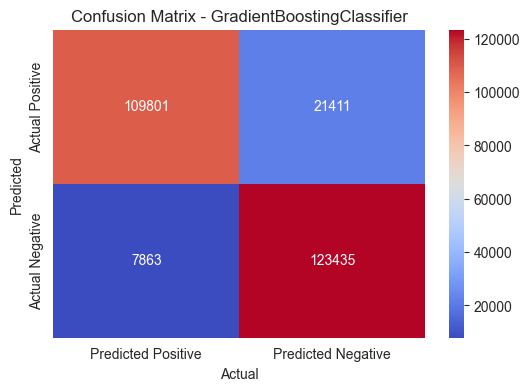

----------------------------------------------------------------------
model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84    117665
           1       0.90      0.82      0.86    144845

    accuracy                           0.85    262510
   macro avg       0.85      0.86      0.85    262510
weighted avg       0.86      0.85      0.85    262510



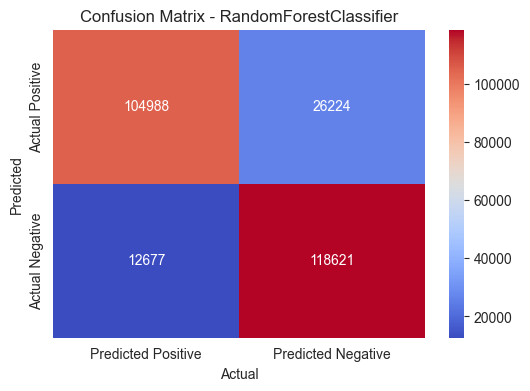

----------------------------------------------------------------------


In [280]:
# Iterating over models 
for model in final_models_finetuned:
    # Create a pipeline containing the preprocesor and the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    # Fit pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_val)

    # print classification report
    print('model: ', model.__class__.__name__)
    print('Classification Report: \n', classification_report(y_pred, y_val))

    #Generate and display confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', 
                xticklabels=['Predicted Positive', 'Predicted Negative'], 
                yticklabels=['Actual Positive', 'Actual Negative'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    print('--'*35)

Export Key Components

We export the important ML objects that will be used to develop an app: encoder and pipeline.

In [278]:
components= {
    'preprocessor': preprocessor,
    'model': final_models_finetuned[0],
}

saving best model

In [279]:
#path to the destination directory
destination = "..\model"

# Construct the full file path
file_path = os.path.join(destination, "ml.pkl")

# Save the components object as a pickled file
with open(file_path, "wb") as f:
    pickle.dump(components, f)